# Análisis Exploratorio de Datos

Preprocesamiento y Limpieza de Datos

Aunque no es un análisis como tal, es común durante la EDA identificar las necesidades de preprocesamiento, que pueden incluir:

Eliminación de stop words: Eliminar palabras comunes que no agregan mucho significado al texto.
Stemming y Lematización: Reducir las palabras a su raíz o forma base, respectivamente.


1. Estadísticas Descriptivas Básicas
Conteo de palabras: Determinar el número de palabras en cada documento o texto.
Conteo de sentencias: Determinar el número de sentencias en cada documento o texto.
Distribución de la longitud de las palabras: Analizar la distribución de la longitud de las palabras en el corpus.
2. Análisis de Frecuencia
Frecuencia de palabras: Identificar las palabras más y menos frecuentes en el corpus.
Frecuencia de n-gramas: Identificar los n-gramas (secuencias de n palabras) más y menos comunes.
3. Visualizaciones
Histogramas: Crear histogramas para visualizar la distribución de diferentes características, como la longitud de las palabras o sentencias.
Word Clouds (Nube de palabras): Crear una nube de palabras para visualizar las palabras más frecuentes en el corpus.
4. Análisis de Sentimientos
Polaridad: Determinar la polaridad de los textos (por ejemplo, positivo, negativo, neutro).
Subjetividad: Determinar la subjetividad de los textos (objetivo vs. subjetivo).
5. Identificación de Temas y Tópicos
Análisis de tópicos: Usar técnicas como Latent Dirichlet Allocation (LDA) para identificar los tópicos principales en el corpus.
Análisis de correlación de términos: Identificar correlaciones entre diferentes términos en el corpus.
6. Análisis de Outliers
Detección de outliers: Identificar textos que sean anómalos o que se desvíen significativamente de la mayoría.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/main/spam_text_class.csv',delimiter=',',encoding='latin-1')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
def print_message(index):
    example = df[df.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

## Preprocesamiento

In [6]:

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib
# import nltk

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

En el procesamiento de lenguaje natural (NLP), el preprocesamiento de texto es una etapa crucial que se realiza antes de aplicar algoritmos de aprendizaje automático previo a la clasificación de texto. La función diseñada en Python, preprocess_and_lemmatize, es una implementación de un preprocesamiento estándar que ayuda a limpiar y estructurar el texto de entrada para hacerlo más adecuado para su posterior análisis. A continuación, se explican los pasos realizados en esta función y se discute por qué son necesarios:

**Paso 1: Conversión a Minúsculas**

Este paso consiste en convertir todo el texto a minúsculas. La razón detrás de esto es que las letras mayúsculas y minúsculas se tratan como diferentes por la mayoría de los algoritmos de NLP, y al convertir todo el texto a minúsculas, se asegura que las palabras con diferentes capitalizaciones se traten de la misma manera.

**Paso 2: Tokenización**

La tokenización implica dividir el texto en unidades más pequeñas llamadas "tokens" o palabras. Esto es esencial porque permite analizar el texto palabra por palabra y capturar su estructura y significado. La función word_tokenize de NLTK se utiliza para este propósito.

**Paso 3: Eliminación de Puntuación, Stopwords y Caracteres No Alfanuméricos**

En este paso, se eliminan elementos no deseados del texto. Esto incluye la eliminación de signos de puntuación, palabras vacías (stopwords) y cualquier otro carácter que no sea alfanumérico. Las palabras vacías son palabras comunes como "a", "the", "and" que no aportan mucho significado por sí mismas y a menudo se eliminan para mejorar la calidad del análisis.

**Paso 4: Lematización**

La lematización es el proceso de reducir las palabras a su forma base o raíz. Por ejemplo, convierte palabras como "corriendo" en "correr" o "ratones" en "ratón". La lematización ayuda a normalizar las palabras y reducir la dimensionalidad del vocabulario, lo que facilita el análisis y la generalización en modelos de aprendizaje automático.

**Paso 5: Reunión de Tokens Lematizados**

Finalmente, los tokens lematizados se vuelven a unir en un solo texto. Esto produce el texto preprocesado final que es más limpio y estructurado, listo para ser utilizado en algoritmos de aprendizaje automático.

In [3]:
# Load the spaCy language model for English
nlp = spacy.load('en_core_web_sm')

def preprocess_and_lemmatize(text):
    # Step 1: Lowercase the text
    text = text.lower()
    
    # Step 2: Tokenize the text
    tokens = word_tokenize(text)
    
    # Step 3: Remove punctuation, stopwords, and non-alphanumeric characters
    cleaned_tokens = [
        word for word in tokens 
        if word not in string.punctuation and word.isalnum() and word not in stopwords.words('english')
    ]
    
    # Step 4: Lemmatize the cleaned text using spaCy
    doc = nlp(' '.join(cleaned_tokens))  # Join cleaned tokens for lemmatization
    lemmas = [token.lemma_ for token in doc]
    
    # Step 5: Rejoin the lemmatized tokens into a final cleaned and lemmatized text
    cleaned_and_lemmatized_text = ' '.join(lemmas)
    
    return cleaned_and_lemmatized_text

df['message_preprocessed'] = df['Message'].apply(preprocess_and_lemmatize)

In [4]:
df.head()

,Category,Message,message_preprocessed
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though


### Cantidad de mensajes por categoría

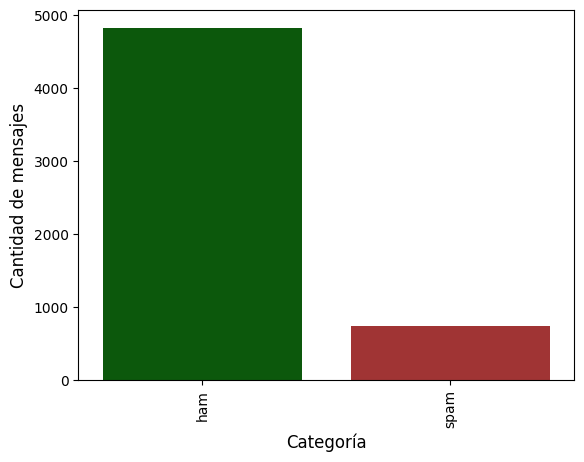

In [9]:
custom_palette = {'spam': '#B22222', 'ham': '#006400'}
matplotlib.rc_file_defaults()

cnt_pro = df['Category'].value_counts()
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, palette = custom_palette)
plt.ylabel('Cantidad de mensajes', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Conteo de palabras por categoría

In [12]:
# Función para contar las palabras en una cadena
def word_count(text):
    return len(str(text).split())

df['Word_Count'] = df['Message'].apply(word_count)

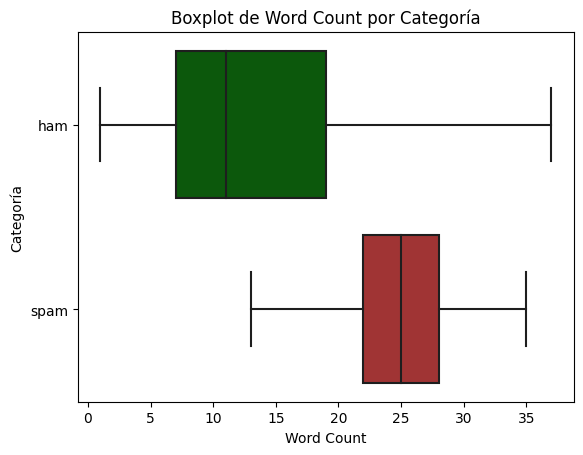

In [29]:
custom_palette = {'spam': '#B22222', 'ham': '#006400'}

# Crear un boxplot de la columna 'word_count' segmentada por 'Category'
sns.boxplot(x='Word_Count', y='Category', data=df, orient = 'h', showfliers = False, palette=custom_palette)

# Establecer los títulos y etiquetas
plt.title('Boxplot de Word Count por Categoría')
plt.xlabel('Word Count')
plt.ylabel('Categoría')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

mismo gráfico con outliers

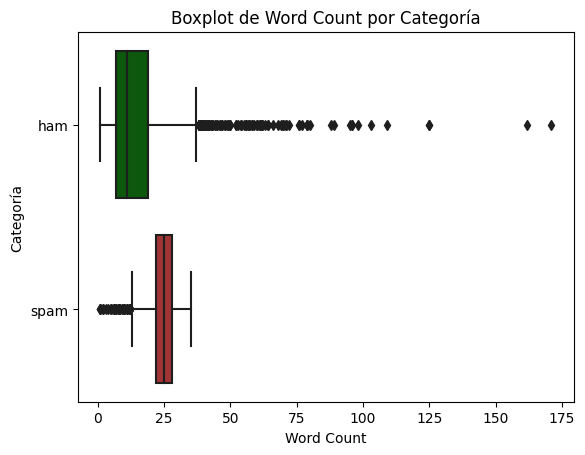

In [28]:
custom_palette = {'spam': '#B22222', 'ham': '#006400'}

# Crear un boxplot de la columna 'word_count' segmentada por 'Category'
sns.boxplot(x='Word_Count', y='Category', data=df, orient = 'h', palette=custom_palette)

# Establecer los títulos y etiquetas
plt.title('Boxplot de Word Count por Categoría')
plt.xlabel('Word Count')
plt.ylabel('Categoría')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

### Conteo de oraciones por categoría

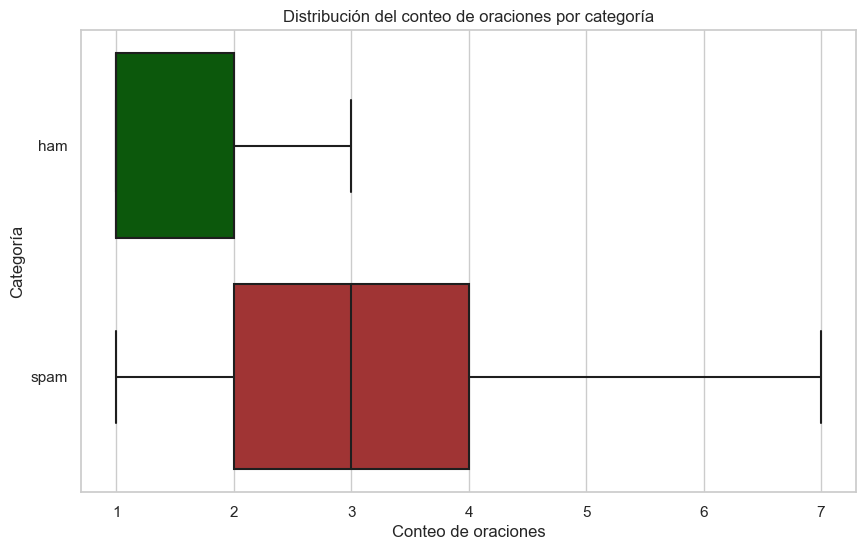

In [54]:
# Define a function to count sentences in a message
def count_sentences(message):
    sentences = nltk.sent_tokenize(message)
    return len(sentences)

# Apply the function to each row in the DataFrame
df['sentence_count'] = df['Message'].apply(count_sentences)


# Create a boxplot of the sentence counts per category using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define the custom color palette
custom_palette = {'spam': '#B22222', 'ham': '#006400'}

# Use Seaborn to create the boxplot
sns.set(style="whitegrid")  # Set the plot style
sns.boxplot(data=df, x='sentence_count', y='Category', palette=custom_palette, orient='h', showfliers = False)
plt.xlabel('Conteo de oraciones')
plt.ylabel('Categoría')
plt.title('Distribución del conteo de oraciones por categoría')
plt.show()

### Análisis de frecuencia de palabras por categoría

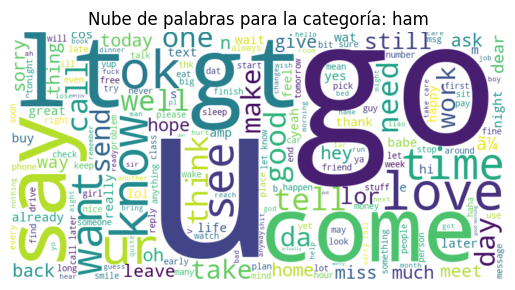

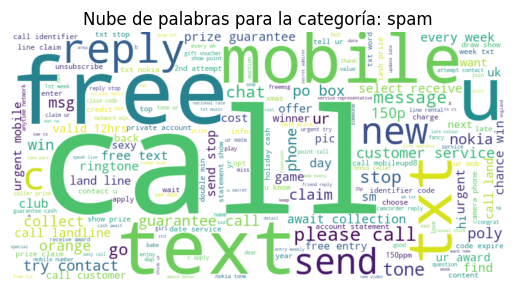

In [38]:
# Agrupa los mensajes por 'Category' y concatena los mensajes en una sola cadena para cada categoría
grouped_messages = df.groupby('Category')['message_preprocessed'].apply(lambda x: ' '.join(x.astype(str)))

# Crea una nube de palabras para cada categoría
for category, messages in grouped_messages.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(messages)
    
    # Muestra la nube de palabras
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras para la categoría: {category}')
    plt.show()

## Análisis de sentimientos

### Detección del sentimiento

In [6]:
analyzer = SentimentIntensityAnalyzer()

############## get sentiment score ##############

def get_sentiment_score(text):
    sentiment_scores = analyzer.polarity_scores(text)
    
    return sentiment_scores['compound']

df['sentiment_scores_compound'] = df['Message'].apply(get_sentiment_score)

############## get sentiment label ###############

def get_sentiment_label(text):
    sentiment_scores = analyzer.polarity_scores(text)
    
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Message'].apply(get_sentiment_label)

### Intensidad del sentimiento por categoria 

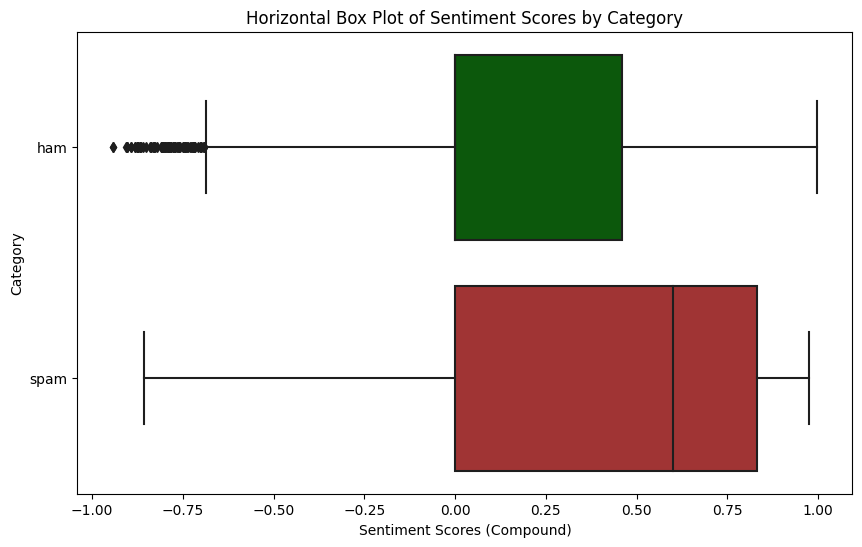

In [27]:
# Define custom colors for 'spam' and 'ham'
custom_palette = {'spam': '#B22222', 'ham': '#006400'}

# Create a horizontal box plot with custom colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='sentiment_scores_compound', y='Category', data=df, orient='h', palette=custom_palette)
plt.xlabel('Sentiment Scores (Compound)')
plt.ylabel('Category')
plt.title('Horizontal Box Plot of Sentiment Scores by Category')
plt.show()

### Porcentaje de sentimiento por categoria

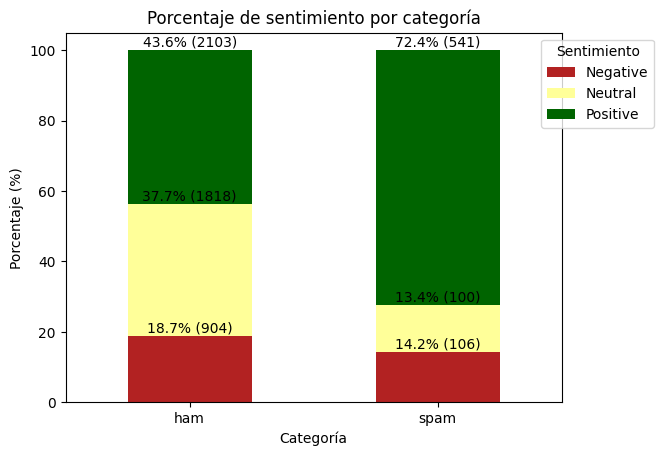

In [32]:
# Define custom colors
custom_colors = {'Negative': '#B22222', 'Positive': '#006400', 'Neutral': '#FFFF99'}

# Group the data by 'Category' and 'Sentiment' and count the occurrences
sentiment_counts = df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the total counts per category
total_counts = sentiment_counts.sum(axis=1)

# Calculate the percentage of each sentiment for each category
percentage_sentiments = sentiment_counts.divide(total_counts, axis=0) * 100

# Plot the data using a stacked bar plot with custom colors
ax = percentage_sentiments.plot(kind='bar', stacked=True, color=[custom_colors[sent] for sent in percentage_sentiments.columns])
plt.xlabel('Categoría')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de sentimiento por categoría')
plt.legend(title='Sentimiento', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)

# Add percentage labels with counts in parenthesis next to the percentage in the bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height
    count = sentiment_counts.iloc[i % 2, i // 2]  # Adjust indexing
    ax.annotate(f'{percentage:.1f}% ({count})', (x + width / 2, y + height + 1), ha='center')